## Generating Synthetic Data (CTGAN)

In [1]:
import os, sys

In [1]:
import torch

if torch.cuda.is_available():
    print("CUDA is available!")
else:
    print("CUDA is not available.")


CUDA is available!


In [3]:

import torch
torch.cuda.is_available()


True

In [1]:
import os
import tensorflow as tf


os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Check if GPU is available
if tf.config.experimental.list_physical_devices('GPU'):
    print('GPU is available')
else:
    print('GPU is not available')



GPU is not available


In [4]:
import torch
torch.cuda.empty_cache()
#torch.cuda.is_available()
device = torch.device("cuda")
my_tensor = torch.tensor([1, 2, 3], device=device)
torch.cuda.max_memory_allocated()

512

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
import pickle
from collections import defaultdict
from itertools import islice, combinations
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

from ctgan import CTGAN


In [2]:

df_raw=pd.read_csv(r"C:\Users\las\Desktop\pfe\fraud\data\generate.csv", encoding='utf-8-sig')

In [7]:
df_raw

,Declaration ID,Date,Office ID,Process Type,Import Type,Import Use,Payment Type,Mode of Transport,Declarant ID,Importer ID,...,HS6 Code,Country of Departure,Country of Origin,Tax Rate,Tax Type,Country of Origin Indicator,Net Mass,Item Price,Fraud,Critical Fraud
0,97061800,2020-01-01,30,B,11,21,11,10,ZZR1LT6,QLRUBN9,...,440890,BE,BE,0.0,FEU1,G,108.0,3.722544e+05,0,0
1,85945189,2020-01-01,40,B,11,21,11,40,SWF9S4X,7JD1S2X,...,690722,CN,CN,8.0,A,Y,11352.0,3.757512e+05,0,0
2,77854751,2020-01-01,20,B,11,21,11,40,X4XT6P8,WI9O3I5,...,620822,CN,CN,5.2,FCN1,B,20.7,5.353020e+03,0,0
3,46925060,2020-01-01,40,B,11,21,43,40,K7LCQTZ,6LI9721,...,940350,VN,VN,0.0,C,Y,9218.0,1.477645e+06,0,0
4,34131149,2020-01-01,20,B,11,21,11,10,1HMVIVH,RZ871V1,...,71080,VN,VN,27.0,A,B,24000.0,6.364800e+06,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,25225594,2021-06-30,40,B,87,21,18,40,BUK2SI8,Y7K2P0D,...,844399,SG,CN,0.0,C,Y,2.2,1.463000e+02,0,0
53996,17739793,2021-06-30,40,B,11,21,11,10,44F36R4,MIDF9C7,...,960329,CN,CN,3.2,FCN1,B,121.2,3.842040e+03,0,0
53997,70427265,2021-06-30,33,B,11,21,11,50,EJW9AY4,ZSST0QO,...,30749,CN,CN,12.0,FCN1,Y,21450.0,1.186078e+08,0,0
53998,60306302,2021-06-30,20,B,11,21,11,10,7GHJ33J,S6BWQ6D,...,851762,CN,CN,0.0,C,B,25.4,6.910349e+05,0,0


In [3]:
df_org=df_raw[["Declaration ID","Date" , "Office ID" , "Process Type", "Import Type", "Import Use", "Payment Type", 
                  "Mode of Transport", "Declarant ID", "Importer ID", "Seller ID", "Courier ID", 
                  "HS6 Code", "Country of Departure", "Country of Origin",  "Tax Rate", "Tax Type", 
                   "Country of Origin Indicator", "Net Mass", "Item Price", "Fraud", "Critical Fraud"]]

In [5]:

df_sample=df_org.sample(200, replace=False)
df_sample.to_csv(r"C:\Users\las\Desktop\pfe\fraud\data\sample.csv", index=False, encoding='utf-8-sig')

In [6]:

cols = ['HS6 Code', 'Country of Departure', 'Country of Origin', 'Tax Rate', 'Tax Type', 'Net Mass','Fraud', 'Critical Fraud']
df_sample['Aggregated'] =df_sample[cols].apply(lambda row: '^'.join(row.values.astype(str)), axis=1)
df_sample=df_sample.drop(cols, axis=1)


In [7]:
df_sample['Date']=df_sample['Date'].astype('str')

In [8]:
df_sample

,Declaration ID,Date,Office ID,Process Type,Import Type,Import Use,Payment Type,Mode of Transport,Declarant ID,Importer ID,Seller ID,Courier ID,Country of Origin Indicator,Item Price,Aggregated
35029,95515325,2020-12-03,40,B,11,21,11,40,3BTA0QN,RT96YOK,NaN,NaN,G,35845.70,902780^CN^CN^0.0^CIT^11.0^0^0
14406,35139091,2020-05-12,16,B,11,21,11,10,E3Q8ABV,PC2A4KV,FHKJC71,NaN,B,9084800.00,845150^CN^CN^0.0^FCN1^27200.0^0^0
3983,14387763,2020-01-28,20,B,11,21,11,40,DWNJQL8,2VY98AT,SVTSB9Z,NaN,E,2057.44,392410^US^US^0.0^FUS1^1469.6^1^1
43396,97947165,2021-03-12,40,B,11,21,43,40,RGIIHEQ,5S3RCE5,4QC013K,EIZP3I,Y,4496032.00,90421^CN^CN^270.0^W2^4360.0^0^0
14154,87113598,2020-05-08,20,B,11,21,11,10,E3Q8ABV,8BGWV9Z,OJP0SXE,NaN,G,4512000.00,91011^CN^CN^377.3^W2^24000.0^0^0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16776,76955801,2020-06-03,40,B,11,21,43,10,ZKXGCQR,LRI0KXI,QDLP9YQ,77BN4M,S,11.64,830140^CN^CN^0.0^FCN1^0.4^0^0
31570,41752185,2020-10-31,20,B,11,21,43,10,WQO6QJN,MFV9AL2,BAX8ZXV,NaN,B,1.92,392690^JP^TW^6.5^C^3.2^1^1
39216,39060658,2021-01-25,40,B,89,21,11,40,PF1L1IG,NQIEEVN,WTINW6E,NaN,E,227006.72,853620^CN^CN^4.0^E1^53.6^0^0
25082,49761499,2020-08-24,40,B,11,21,11,10,KWSE1HX,B9VTTIN,YBM3BM7,NaN,G,1057.80,950790^CN^CN^0.0^FCN1^82.0^0^0


In [9]:
categorical_columns =['Declaration ID' , 'Date', 'Office ID' ,'Process Type','Declarant ID','Importer ID','Seller ID',
                      'Courier ID','Country of Origin Indicator', 'Item Price' , 'Aggregated']


In [10]:
import gc
gc.collect()
import torch
torch.cuda.empty_cache()

In [11]:
ctgan = CTGAN(verbose=True)
ctgan.fit(df_sample, categorical_columns, epochs = 100)

Gen. (3.87) | Discrim. (-0.02): 100%|██████████| 100/100 [00:14<00:00,  7.03it/s]


In [12]:

count_row = df_sample.shape[0] 
df_syn = ctgan.sample(count_row)

In [13]:
df_syn

,Declaration ID,Date,Office ID,Process Type,Import Type,Import Use,Payment Type,Mode of Transport,Declarant ID,Importer ID,Seller ID,Courier ID,Country of Origin Indicator,Item Price,Aggregated
0,72137286,2020-03-06,33,B,52,21,10,13,Z2I27J4,85LF707,QC2FS6W,NaN,E,2106.00,844130^CN^CN^0.0^FCN1^432.0^1^1
1,81894492,2020-09-11,40,B,6,21,12,14,OGSN7P6,I8E3QYY,Q7Q5NE9,W5AYVM,E,16499200.00,732690^MY^KR^8.0^A^1020.0^0^0
2,25828576,2020-08-25,40,B,57,21,9,10,SM89FYN,H57QUID,95JVT3P,NaN,S,10032.00,760120^AE^AE^1.0^A^95236.0^0^0
3,12034367,2020-11-20,20,B,48,21,11,14,LIDFHWP,8CT2L51,1PLG40N,NaN,G,16.16,847790^US^US^0.0^FUS1^1650.0^0^0
4,48842240,2021-02-01,30,B,55,21,33,15,1XCM1XF,8CT2L51,Q01ZXXC,NaN,Y,7170000.00,852871^HK^CN^0.0^C^20.0^0^0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,31031561,2020-02-18,20,B,8,21,11,14,K2ZFUPI,RXPUFI6,RKAOF3X,NaN,Y,43616.00,382499^TW^KR^6.5^C^345.6^0^0
196,82435811,2021-02-01,40,B,39,21,9,43,KWSE1HX,9VMVRCP,NaN,NaN,S,16499200.00,853669^DE^DE^0.0^FEU1^29.0^0^0
197,87889163,2021-04-20,40,B,9,21,11,12,RU9K634,EZPJ2HR,Z7GT4JG,NaN,S,13264.50,90421^CN^CN^50.0^W1^16000.0^0^0
198,28477826,2021-06-21,40,B,8,21,10,14,WS7HRMI,04WPW2F,NaN,MWIDNS,G,1231.19,281122^CN^CN^0.0^FCN1^6600.0^0^0


In [14]:

df_syn['HS10 Code']=df_syn["Aggregated"].str.split('^').str[0]
df_syn['Country of Departure']=df_syn["Aggregated"].str.split('^').str[1]
df_syn['Country of Origin']=df_syn["Aggregated"].str.split('^').str[2]
df_syn['Tax Rate']=df_syn["Aggregated"].str.split('^').str[3]
df_syn['Tax Type']=df_syn["Aggregated"].str.split('^').str[4]
df_syn['Net Mass']=df_syn["Aggregated"].str.split('^').str[5]
df_syn['Fraud']=df_syn["Aggregated"].str.split('^').str[6]
df_syn['Critical Fraud']=df_syn["Aggregated"].str.split('^').str[7]
df_syn = df_syn.drop(['Aggregated'],axis=1)


In [15]:
df_syn.columns

Index(['Declaration ID', 'Date', 'Office ID', 'Process Type', 'Import Type',
       'Import Use', 'Payment Type', 'Mode of Transport', 'Declarant ID',
       'Importer ID', 'Seller ID', 'Courier ID', 'Country of Origin Indicator',
       'Item Price', 'HS10 Code', 'Country of Departure', 'Country of Origin',
       'Tax Rate', 'Tax Type', 'Net Mass', 'Fraud', 'Critical Fraud'],
      dtype='object')

In [16]:
new_order= ['Declaration ID', 'Date', 'Office ID', 'Process Type', 'Import Type',
       'Import Use', 'Payment Type', 'Mode of Transport', 'Declarant ID',
       'Importer ID', 'Seller ID', 'Courier ID', 
        'HS10 Code', 'Country of Departure', 'Country of Origin',
       'Tax Rate', 'Tax Type','Country of Origin Indicator', 'Net Mass','Item Price', 'Fraud', 'Critical Fraud']
df_syn=df_syn[new_order]

In [17]:
df_syn["HS10 Code"] = df_syn["HS10 Code"].astype(str).str.zfill(10)
df_syn["HS10 Code"] = df_syn["HS10 Code"].apply(lambda x : x[:-4])
df_syn = df_syn.rename(columns={'HS10 Code': 'HS6 Code'})

In [18]:

df_syn

,Declaration ID,Date,Office ID,Process Type,Import Type,Import Use,Payment Type,Mode of Transport,Declarant ID,Importer ID,...,HS6 Code,Country of Departure,Country of Origin,Tax Rate,Tax Type,Country of Origin Indicator,Net Mass,Item Price,Fraud,Critical Fraud
0,72137286,2020-03-06,33,B,52,21,10,13,Z2I27J4,85LF707,...,000084,CN,CN,0.0,FCN1,E,432.0,2106.00,1,1
1,81894492,2020-09-11,40,B,6,21,12,14,OGSN7P6,I8E3QYY,...,000073,MY,KR,8.0,A,E,1020.0,16499200.00,0,0
2,25828576,2020-08-25,40,B,57,21,9,10,SM89FYN,H57QUID,...,000076,AE,AE,1.0,A,S,95236.0,10032.00,0,0
3,12034367,2020-11-20,20,B,48,21,11,14,LIDFHWP,8CT2L51,...,000084,US,US,0.0,FUS1,G,1650.0,16.16,0,0
4,48842240,2021-02-01,30,B,55,21,33,15,1XCM1XF,8CT2L51,...,000085,HK,CN,0.0,C,Y,20.0,7170000.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,31031561,2020-02-18,20,B,8,21,11,14,K2ZFUPI,RXPUFI6,...,000038,TW,KR,6.5,C,Y,345.6,43616.00,0,0
196,82435811,2021-02-01,40,B,39,21,9,43,KWSE1HX,9VMVRCP,...,000085,DE,DE,0.0,FEU1,S,29.0,16499200.00,0,0
197,87889163,2021-04-20,40,B,9,21,11,12,RU9K634,EZPJ2HR,...,000009,CN,CN,50.0,W1,S,16000.0,13264.50,0,0
198,28477826,2021-06-21,40,B,8,21,10,14,WS7HRMI,04WPW2F,...,000028,CN,CN,0.0,FCN1,G,6600.0,1231.19,0,0


# Save Generated Data

In [19]:

df_syn.to_csv("C:\\Users\\las\\Desktop\\pfe\\fraud\\data\\df_synt.csv", index=False)

# Evaluate synthetic data

IPython not installed.
(500, 22) (500, 22)


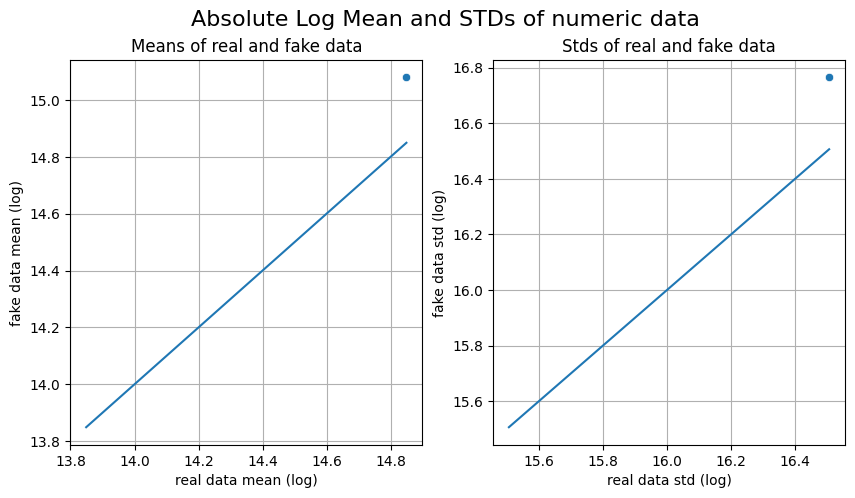

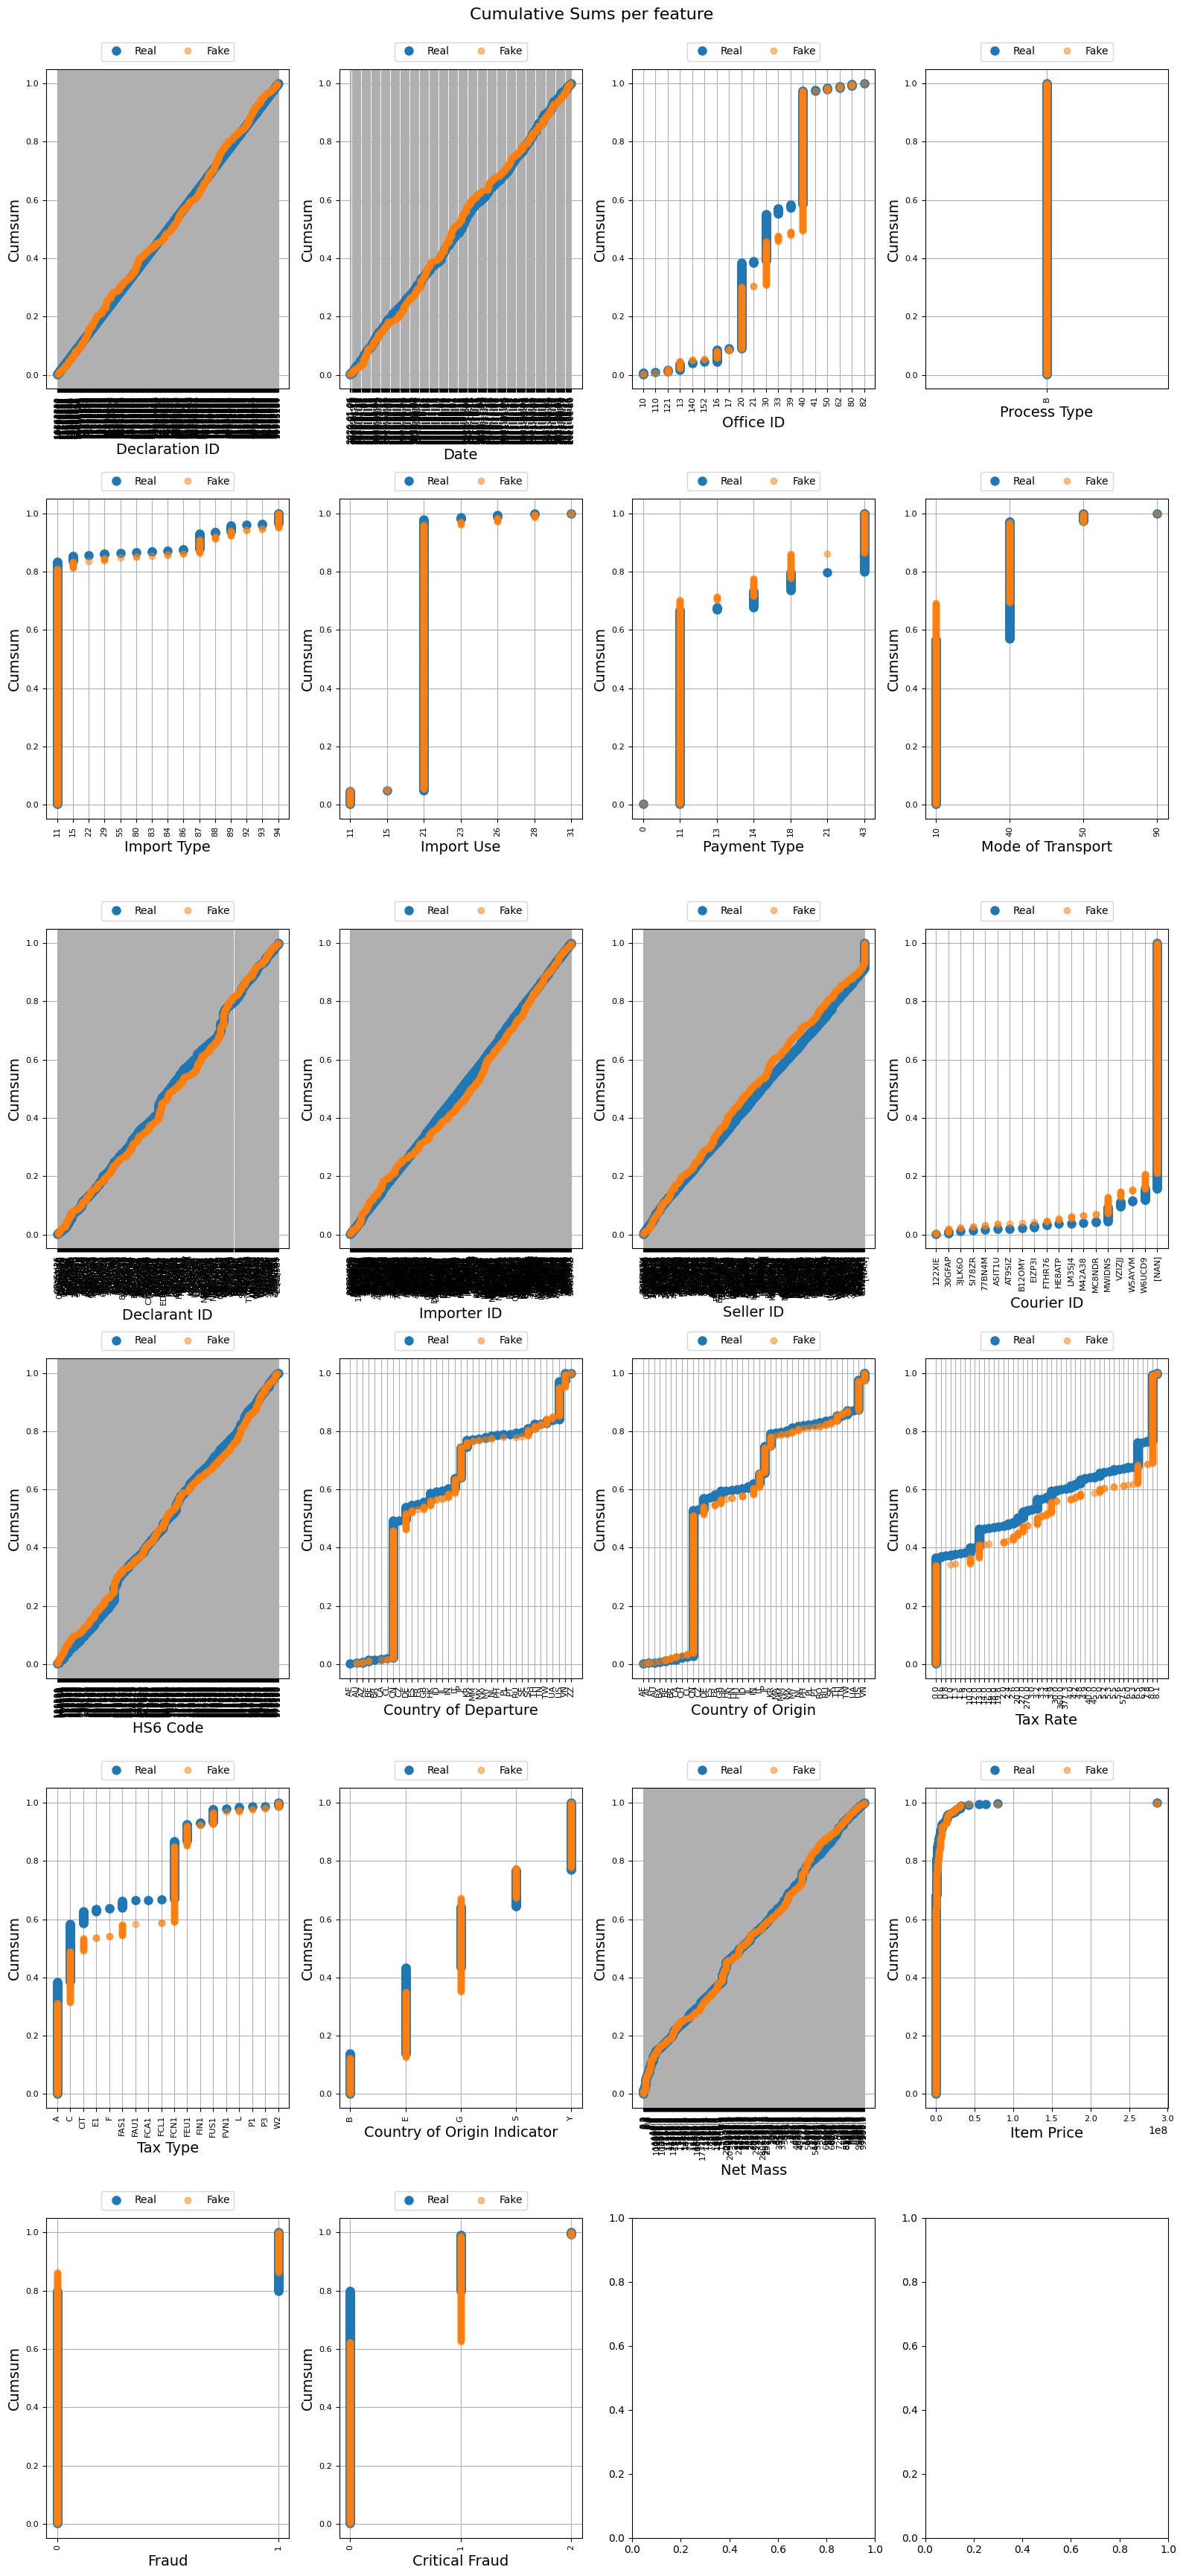

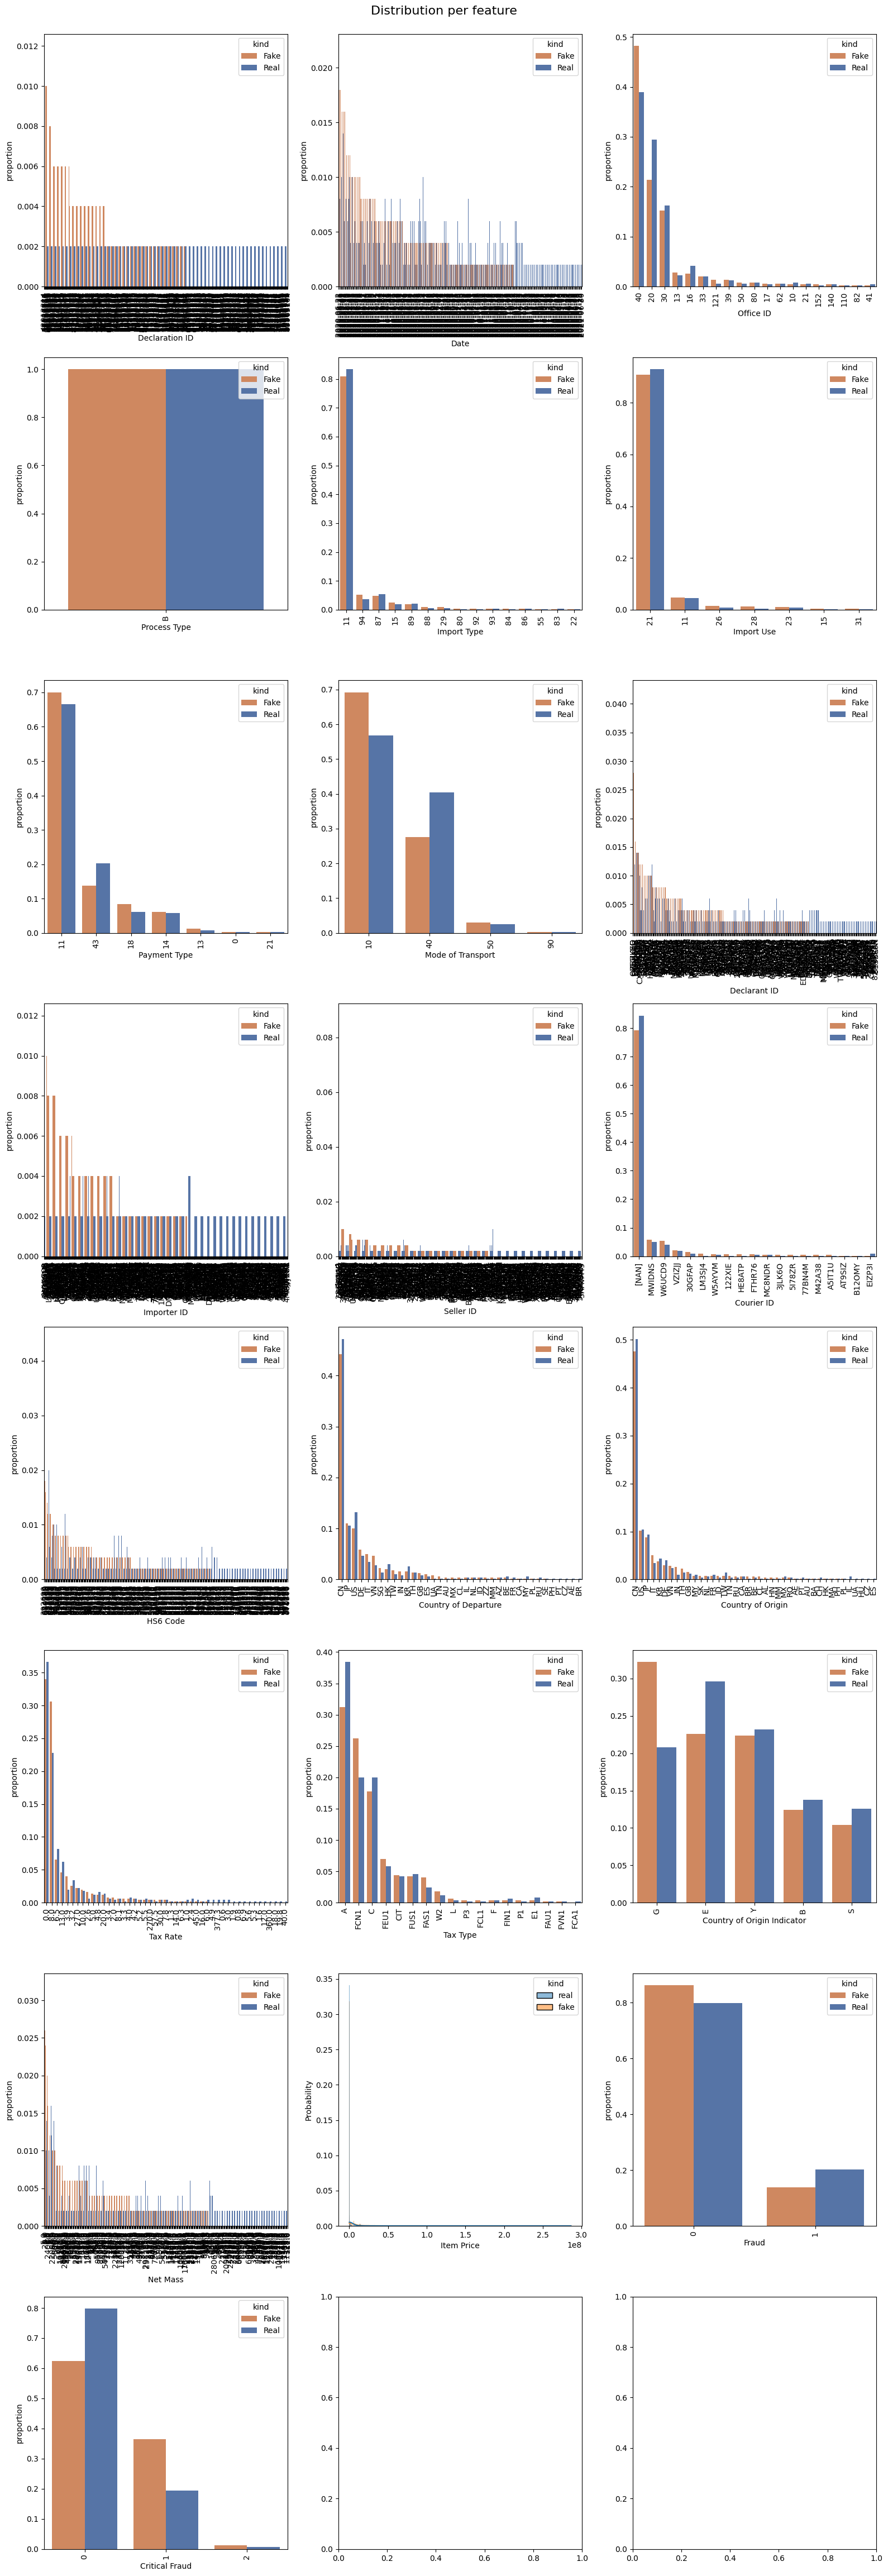

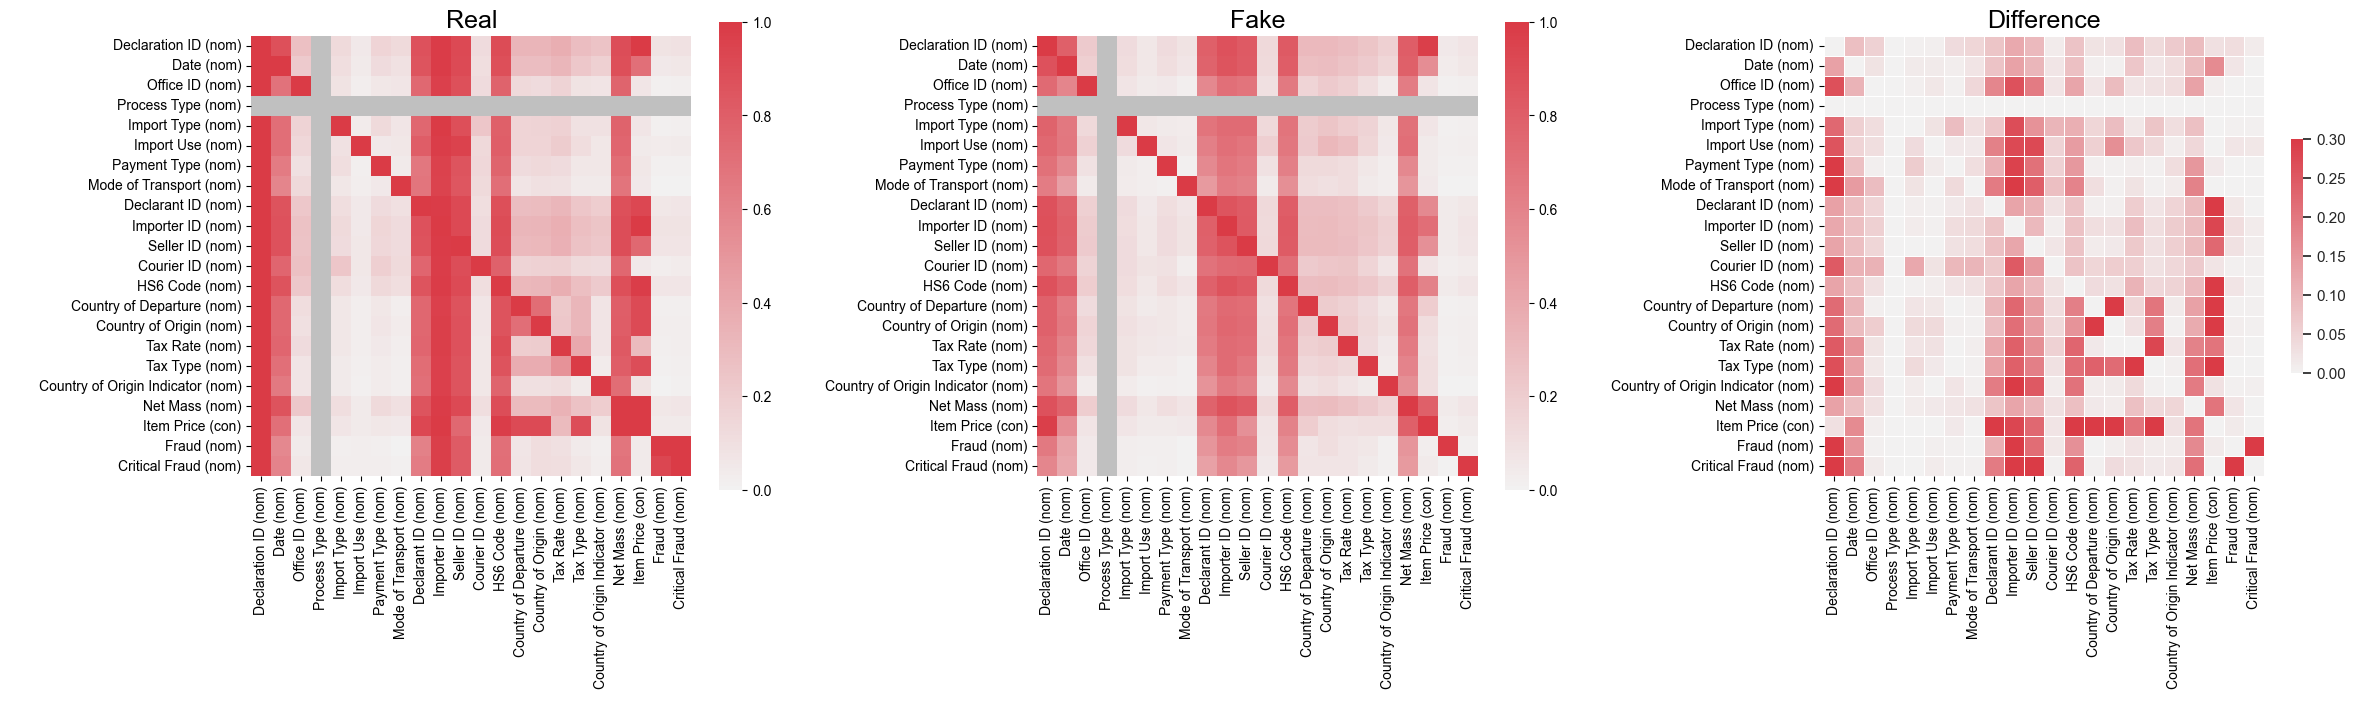

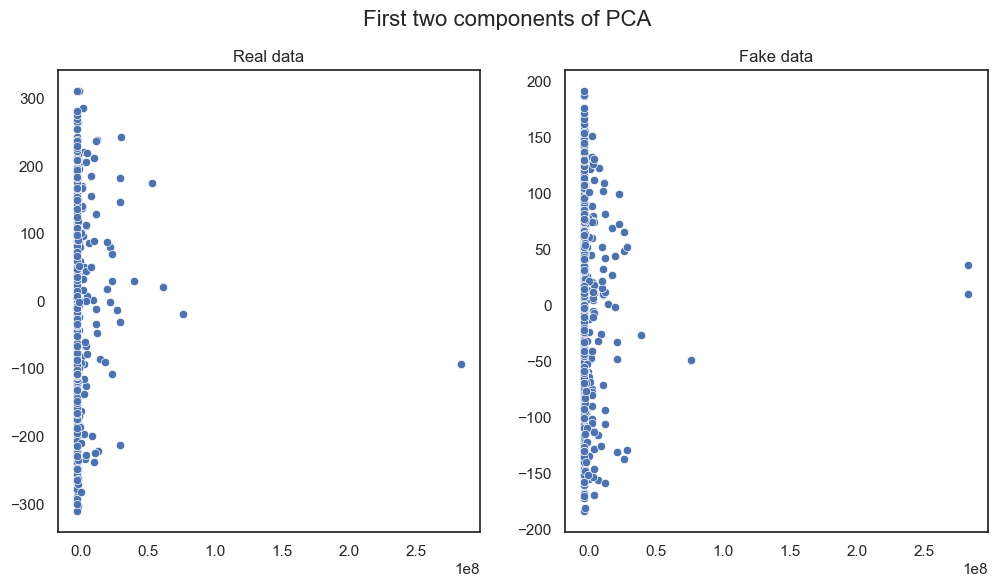

In [20]:
from table_evaluator import TableEvaluator
categorical_columns =["Declaration ID","Date" , "Office ID" , "Process Type", "Import Type", "Import Use", "Payment Type", 
                  "Mode of Transport", "Declarant ID", "Importer ID", "Seller ID", "Courier ID", 
                  "HS6 Code", "Country of Departure", "Country of Origin",  "Tax Rate", "Tax Type", 
                   "Country of Origin Indicator", "Net Mass", "Fraud", "Critical Fraud"]
data=pd.read_csv("C:/Users/las/Desktop/pfe/fraud/data/samples.csv")
data= data.astype({'Declaration ID':'str', 'Office ID':'str', 'Process Type':'str', 
              'Import Type':'str', 'Import Use':'str', 'Payment Type':'str', 'Mode of Transport':'str', 
              'HS6 Code':'str', 'Fraud':'str', 'Critical Fraud':'str', 'Item Price':'float64'})
data['Date']=data['Date'].astype('str')

df_syn=pd.read_csv("C:/Users/las/Desktop/pfe/fraud/data/df_syn.csv")
df_syn= df_syn.astype({'Declaration ID':'str', 'Office ID':'str', 'Process Type':'str', 
              'Import Type':'str', 'Import Use':'str', 'Payment Type':'str', 'Mode of Transport':'str', 
              'HS6 Code':'str', 'Fraud':'str', 'Critical Fraud':'str', 'Item Price':'float64'})
df_syn['Date']=df_syn['Date'].astype('str')
print(data.shape, df_syn.shape)
table_evaluator =  TableEvaluator(data, df_syn, cat_cols= categorical_columns)

table_evaluator.visual_evaluation()